<a href="https://colab.research.google.com/github/aquax-xmarine/AI/blob/main/ClassificationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Exploratory Data Analysis and Data Understanding

#Initial Analysis
a. When and by whom was the dataset created?

Ans: The dataset 'Maternal Health Risk' was created by Marzia Ahmed and her colleagues Mostafijur Rahman, Sabira Khatun, and Mohammod Abul Kashem for their research paper 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)' on March 2020.

b. How did you access the dataset?

Ans: The above dataset was accessed via Kaggle.

c. How does it align with the chosen UNSDG?
ANs: The dataset 'Maternal Health Risk' is closely aligned with the UNSDG3: Good Health and Well-being as it helps to prevent maternal mortality by detecting the symptoms beforehand.

d. List all the attributes (columns) present in the dataset.

Ans: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, and RiskLevel are the 7 attributes present in the dataset.  


# Research Question
How accurately can we predict the risk of maternal health complications using basic health indicators?

#Data Completeness
1. The dataset contains basic health indicators (blood pressure, heart rate, glucose level etc.) which is necessary for analysing maternal health risk.

2. It provides a labeled target variable (Low, Medium, High Risk) is is suitable for supervised classificaton task.

3. The dataset has above 1000 rows which is sufficient for this task.

4. The dataset doesnot contain missing values making the utilization of data points effective.

Limitation
1. The dataset is found to have more than half duplicate rows whcih might reduce the model's effectiveness.

#Relevance
1. The dataset contains relevant attributes necessary for analysing maternal health risk.
2. It directly classifies maternal risk levels, aligning well with the research question.


#Quality
1. The dataset comes from a published study, validating its origins.
2. The numericals values appears to be well-structured and measurable.

#Exploratory Data Analysis (EDA)

In [ ]:
# load the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

# Data cleaning and summary statistics


In [ ]:
# display basic information
print("Dataset Info: ")
print(df.info())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [ ]:
# Check for missing values
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
# Check for duplicate rows
print("Duplicated Rows: ", df.duplicated().sum())xd
df[df.duplicated(keep='first')]


Duplicated Rows:  562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# Remove duplicates(keep only one instance of each unique row)
df.drop_duplicates(inplace=True)
print("Duplicated Rows: ", df.duplicated().sum())
df[df.duplicated(keep='first')]

Duplicated Rows:  0


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [ ]:
print("Total rows after removing duplicates:", df.shape[0])

Total rows after removing duplicates: 452


In [ ]:
# Compute summary statistics
print("Summary Statistics: ")
print(df.describe())

Summary Statistics: 
              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  452.000000  452.000000   452.000000  452.000000  452.000000  452.000000
mean    29.194690  110.553097    75.418142    8.346173   98.692478   73.949115
std     13.767379   17.872282    13.754578    2.829209    1.410897    8.156973
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000   90.000000    65.000000    6.900000   98.000000   70.000000
50%     25.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     35.000000  120.000000    86.000000    7.900000   98.000000   80.000000
max     70.000000  160.000000   100.000000   19.000000  103.000000   90.000000


In [ ]:
# Display the first few rows
print("First 5 rows: ")
print(df.head())

First 5 rows: 
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


#Data Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

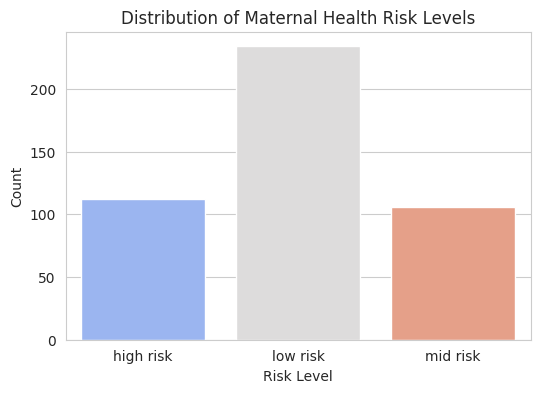

In [ ]:
# Risk Level Distribution (Bar Chart)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="RiskLevel", hue="RiskLevel", palette="coolwarm")
plt.title("Distribution of Maternal Health Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

The above bar chart helps us understand how the data is distributed across high, medium, and low risk levels. According to the above bar chart, the number of women in low risk group completely overwhelms that of women in high and mid risk group. Similarly, the number of women in high risk and mid risk group appear to be approximate.

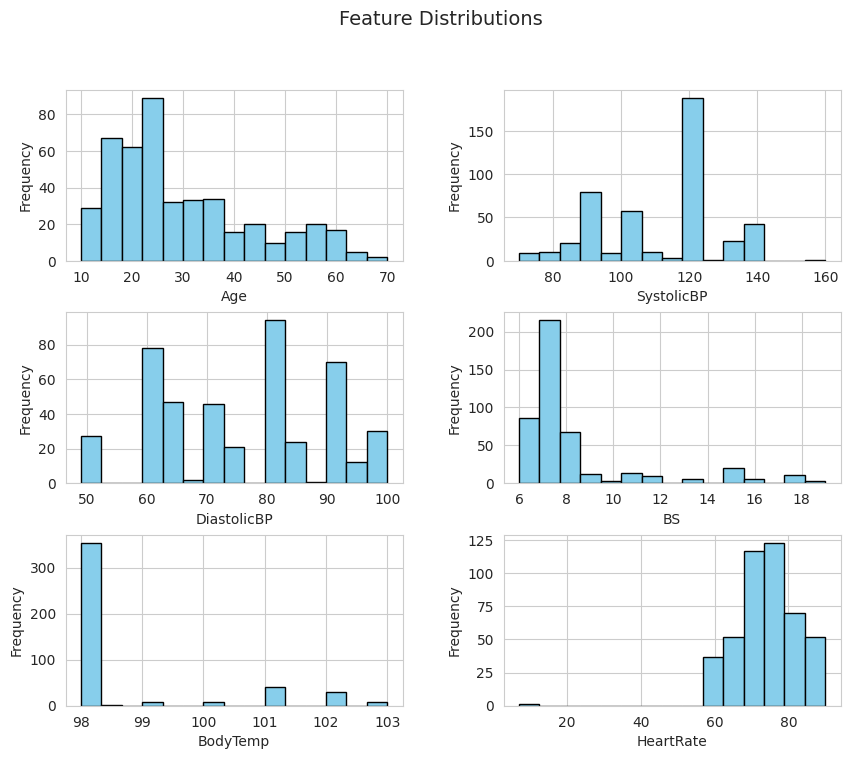

In [ ]:
# Histograms of Key Features

# Create histograms
df.hist(figsize=(10, 8), bins=15, color="skyblue", edgecolor="black")

# Set the overall title
plt.suptitle("Feature Distributions", fontsize=14)

# Label the x and y axes for each subplot
for ax in plt.gcf().axes:  # Loop through all subplot axes
    ax.set_ylabel("Frequency")  # Label y-axis as 'Frequency'
    ax.set_xlabel(ax.get_title())  # Set x-axis label to the feature name
    ax.set_title("")  # Remove the default title to avoid redundancy

plt.show()


The above histograms helps check data skewness and spread. From the above histograms:
1. Right-skewed (Positive-skewnes): age, glucose level, and body temperature, which suggests few individuals have significantly higher values
2. Left-skewed (Negative-skewness): heart rate, which implies few individuals have much lower heart rates.
3. Symmetric (Approximately Normal Distribution): systolicBP, and diastolicBP, which suggests most individuals have blood pressure values close to the mean

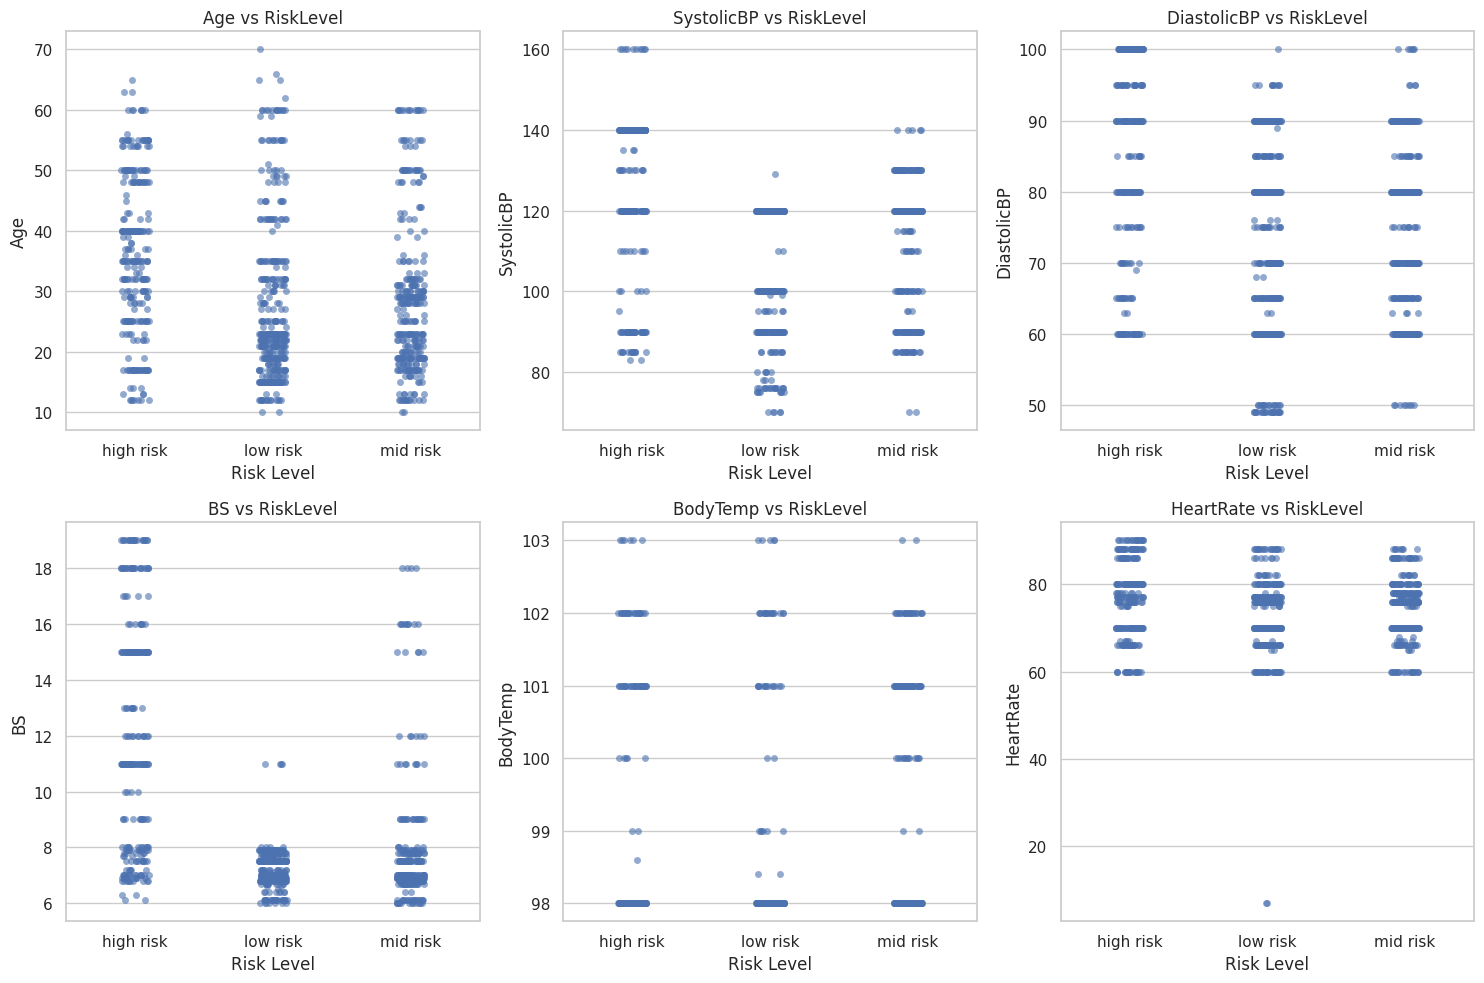

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Define numerical features
numerical_features = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.stripplot(x=df["RiskLevel"], y=df[feature], jitter=True, alpha=0.6)
    plt.title(f"{feature} vs RiskLevel")
    plt.xlabel("Risk Level")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In the above scatter plot, the data points suggest a spread of values for each parameter across risk levels. The plots may indicate trends, such as higher BP or blood sugar in high-risk individuals. Clustering of points might indicate patterns in health parameters associated with different risk levels.


#2. Build a Model from Scratch

#Logistic Regression (Softmax)

In [ ]:
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y_encoded, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y_encoded[train_indices]
    y_test = y_encoded[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
#scale the feature matrix x
def scale_features(x_train, x_test):
  """
  scale features using Z-score normalization
  Arguments:
  x_train: np.ndarray; training data features
  x_test: np.ndarray; testing data features
  Returns:
  x_train_scaled: np.ndarray; scaled training data
  x_test_scaled: np.ndarray; scaled testing data
  """

  mean = np.mean(x_train, axis=0)
  std = np.std(x_train, axis=0)
  x_train_scaled = (x_train - mean) / std
  x_test_scaled = (x_test - mean) / std
  return x_train_scaled, x_test_scaled

In [ ]:
import numpy as np

# Implementing Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Normalize for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Implementing Categorical Log-Loss (Cross-Entropy)
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))  # Adding epsilon to prevent log(0)

# Implementing Cost Function (Average Loss)
def cost_softmax(X, y, W, b):
    n, d = X.shape
    z = np.dot(X, W) + b.reshape(1, -1)  # Ensure b has correct shape
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n  # Avoid log(0) errors

# Compute Gradients for Softmax Regression
def compute_gradient_softmax(X, y, W, b):
    n, d = X.shape
    z = np.dot(X, W) + b.reshape(1, -1)
    y_pred = np.clip(softmax(z), 1e-10, 1.0)  # Prevent instability
    grad_W = np.dot(X.T, (y_pred - y)) / n  # Weight gradient
    grad_b = np.sum(y_pred - y, axis=0) / n  # Bias gradient
    return grad_W, grad_b

# Gradient Descent for Softmax Regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history



In [ ]:
# Decision/Prediction function for softmax regresion for multi-class classification
import numpy as np
def predict_softmax(X, W, b):
  """
  Predict the class labels for input data

  Parameters:

  X (numpy.ndarray): Feature matrix of shape (n, d)
  W (numpy.ndarray): Weight matrix of shape (d, c)
  b (numpy.ndarray): Bias vector of shape (c,)

  Returns:
  numpy.ndarray: Predicted class labels of shape (n,)
  """
  z = np.dot(X,W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1)
  # np.argmax(): returns the index of the maximum value along each row of the y_pred matrix

In [ ]:
# Evaluating Classifier
def evaluate_classsification(y_true, y_pred):
  """
  Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.

  Confusion matrix: shows the performance of the classification model. It is a table with
  actual values(y_true) against predicted values(y_pred). It shows how many times each
  class was correctly or incorrectly predicted.

  Precision: proportion of true positive predictions out of al positive predictions made
  by the classifier.

  Parameters:
  y_true (numpy.ndarray): True class labels of shape (n,)
  y_pred (numpy.ndarray): Predicted class labels of shape (n,)

  Returns:
  tuple: Confusion matrix, precision, recall, and F1-score
  """
  from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
  cm = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
  recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
  f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
  # average="weighted": metric is calculated individually for each class and then averaged,
  # with the average weighted by the number of samples of each class.

  #zero_division=0: if no positive predictions are made, it will return 0 instead of raising an error.

  return cm, precision, recall, f1

In [ ]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Separate feature matrix (X) and target variable (y)
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Apply one-hot encoding to the target variable
y_onehot = pd.get_dummies(y, dtype=int)

# Convert to NumPy arrays (ONLY if still DataFrame)
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
if isinstance(y_onehot, pd.DataFrame):
    y_onehot = y_onehot.to_numpy()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y_onehot, test_size=0.3)


In [ ]:
# Scale the feature matrix
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

Training softmax regression model:
Iteration 0: Cost = 1.071594
Iteration 100: Cost = 0.746158
Iteration 200: Cost = 0.733650
Iteration 300: Cost = 0.729871
Iteration 400: Cost = 0.728372
Iteration 500: Cost = 0.727693
Iteration 600: Cost = 0.727356
Iteration 700: Cost = 0.727179
Iteration 800: Cost = 0.727082
Iteration 900: Cost = 0.727026
Iteration 999: Cost = 0.726995


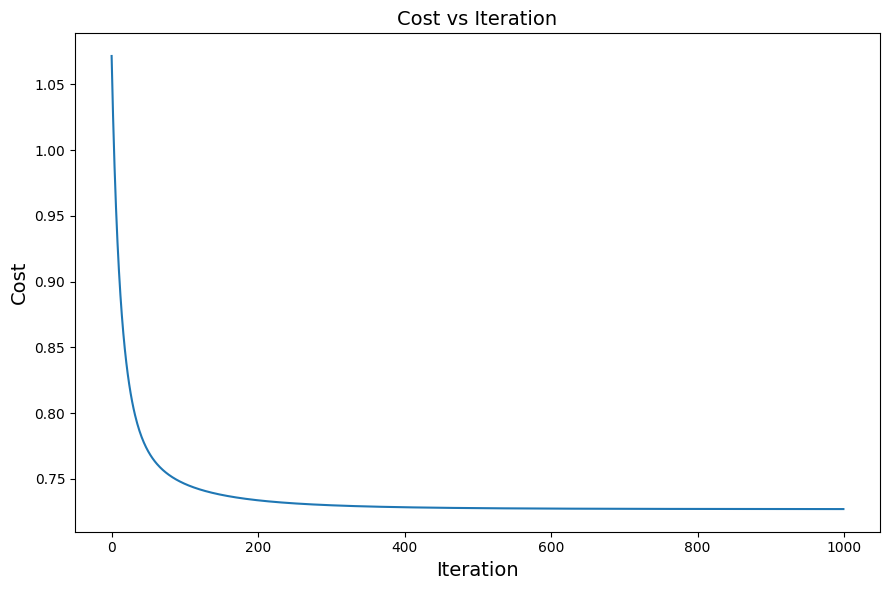

In [ ]:
# Training of the softmax regression
import numpy as np
import matplotlib.pyplot as plt

num_classes = y_train.shape[1] #number of classes within label vector
num_features = X_train_scaled.shape[1] #number of input features
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000

print("Training softmax regression model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot Cost Vs. Iterations:
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Did the model overfit or underfit?
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"Train Loss (Cost): {train_cost:.4f}")
print(f"\nTest Loss (Cost): {test_cost:.4f}")

Train Loss (Cost): 0.7270

Test Loss (Cost): 0.8211


Train Loss (0.7270): A lower loss indicates the predicted values are closer to the true values.

Test Loss (0.8211): The test loss is higher than train loss, indicating that the model might be overfitting to the training data and not generalizing well to unseen data.

In [ ]:
# How well my model did?

# converting one hot encoding into class indices
y_test_true = np.argmax(y_test, axis=1)

# accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# # evaluation
cm, precision, recall, f1 = evaluate_classsification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\nPrecision: {precision:.2f}")
print(f"\nRecall: {recall:.2f}")
print(f"\nF1-Score: {f1:.2f}")

Test Accuracy: 63.70%

Confusion Matrix:
[[20  9  2]
 [ 3 62  0]
 [ 8 27  4]]

Precision: 0.65

Recall: 0.64

F1-Score: 0.57


a. Accuracy (67.70%): The model correctly predicted the class for 67.03% of the test instances.





b. Confusion Matrix:

For Class 0:

1. 20 instances of Class 0 were correclty predicted as Class 0.
2. 9 instances of Class 0 were misclassified as Class 1.
3. 2 instances of Class 0 were misclassified as Class 2.

For Class 1:
1. 3 instances of Class 1 were missclassified as Class 0.
2. 62 instances of Class 1 were correclty predicted as Class 1.
3. No instances of Class 1 were misclassified as Class 2.

For Class 3:
1. 8 instances of Class 2 were misclassified as Class 0.
2. 27 instances of Class 2 were misclassified as Class 1.
3. 4 instance of Class 2 were correctly predicted as Class 2.

Overall, Class 1 is the best predicted class with fewer misclassification. Class 0 has second highest misclassification whereas Class 2 has the highest misclassification rates.

c. Precision (0.65): Precision tells you the proportion of true positive predictions out of all positive predictions for a specific class. In this case, for each predicted positive class, 65% of them were actually correct. This indicates that the model does a decent job at making positive predictions without too many false positives.

d. Recall (0.64): Recall measures the proportion of true positive predictions out of all actual positive instances (true positives + false negatives) of a specific class. Here, the model correctly identified 64% of the actual positive instances. It missed 36% of the false negatives (instances that the model failed to identify correctly and misclassified them as other classes).

F1-Score (0.57): The F1-Score is the harmonic mean of precision and recall. It gives a balance between precision and recall, especially useful when you care about both false positives and false negatives. An F1-Score of 0.57 suggests that the model's performance is somewhat moderate, as it balances between the two metrics but is not performing excellently.

Overall Interpretation:

1. The model performs moderately well but still has room for improvement.
2. It has good precision (indicating that when it predicts a class, it's likely correct) but lower recall (indicating it misses some instances of that class).
3. The F1-score reflects a somewhat imbalanced performance between precision and recall, which suggests that the model might not be classifying all classes effectively.

#3. Build a Primary Model

#KNN model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].values
y = df['RiskLevel'].values

In [ ]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# scale the functions
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# initialize the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# trim the model
knn.fit(X_train, y_train)

# predict on test data
y_pred = knn.predict(X_test)

In [ ]:
# evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"KNN Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"KNN Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"KNN F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:\n", conf_matrix)

KNN Accuracy: 0.66
KNN Precision: 0.65
KNN Recall: 0.66
KNN F1-Score: 0.62
KNN Confusion Matrix:
 [[24  6  2]
 [ 2 59  4]
 [ 3 29  7]]


#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].values
y = df['RiskLevel'].values

In [ ]:
# split data for classification and regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

rf_precision = precision_score(y_test, y_pred, average='weighted')
print(f"Random Forest Classifier Precision: {rf_precision:.2f}")

rf_recall = recall_score(y_test, y_pred, average='weighted')
print(f"Random Forest Classifier Recall: {rf_recall:.2f}")

rf_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f"Random Forest Classifier F1 Score: {rf_f1_score:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Confusion Matrix:\n", conf_matrix)

Random Forest Classifier Accuracy: 0.63
Random Forest Classifier Precision: 0.61
Random Forest Classifier Recall: 0.63
Random Forest Classifier F1 Score: 0.62
Random Forest Classifier Confusion Matrix:
 [[23  4  5]
 [ 2 52 11]
 [ 5 23 11]]


According to the metrics comparison, KNN performed slightly better than Random Forest in terms of all the metrics. Therefore, KNN is the better model for this case.

#Hyper-parameter Optimization with Cross-Validation

#KNN with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# Apply GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


#Random Forest with GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


#Feature Selection

#KNN Model Feature Selection with Wrapper Method

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import itertools

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Manual feature selection using cross-validation to evaluate feature subsets
best_accuracy = 0
best_features = None
num_features = X_train.shape[1]

# Evaluate subsets of features
for i in range(1, num_features+1):  # Try selecting from 1 to num_features
    for feature_set in itertools.combinations(range(num_features), i):
        # Select the current feature subset
        X_train_subset = X_train_scaled[:, feature_set]
        X_test_subset = X_test_scaled[:, feature_set]

        # Perform cross-validation and calculate the average accuracy
        scores = cross_val_score(knn, X_train_subset, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)

        # Update if the current feature subset gives better accuracy
        if mean_score > best_accuracy:
            best_accuracy = mean_score
            best_features = feature_set

# Print the best feature subset and accuracy
print(f"Best Feature Subset: {best_features}")

Best Feature Subset: (1, 3)


The goal of this process is to select most important features that maximize the accuracy of the KNN model in predicting the target variable.

a. Methodology(Wrapper Method + Cross-Validation):

1. We evaluate every possible subset of features by selecting combinations of features and applying 5-fold cross-validation.
2. For each combination, the KNN classifier is trained and validated using cross-validation (cross_val_score).
3. The mean accuracy from the cross-validation is computed for each feature subset.
4. The subset that provides the highest average cross-validation accuracy is selected as the "best" feature subset.

b. Justification for the Chosen Features: The above features were chosen as they provided the highest cross-validation accuracy when combined in the KNN model.


#Random Forest Feature Selection with Wrapper Method

In [ ]:
from sklearn.feature_selection import RFE
import pandas as pd

# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=rf, n_features_to_select=3)  # Select the top 5 features

# Fit the RFE model on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = rfe.support_

# Print the selected features
print(f"Selected Features: {X.columns[selected_features]}")

# Train the Random Forest classifier using the selected features
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Train the Random Forest model and evaluate it
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy with Selected Features: {accuracy:.2f}")


Selected Features: Index(['Age', 'SystolicBP', 'BS'], dtype='object')


The goal of this process is to select most important features that maximize the accuracy of the Random Forest Model in predicting the target variable.

a. Methodology(RFE (Recursive Feature Elimination)): The top 3 features are retained while other less important features are eliminated.

b. Justification for the Chosen Features: Age, SystolicBP, and BS were slected as the top 3 features as they provide the highest accuracy.


#KNN Final Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Assuming df is your dataframe
X = df[['SystolicBP', 'BS']]  # Select the top 3 features
y = df['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rebuild the KNN model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=20, p=1, weights='uniform')

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model's performance on the test set
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy with Optimal Hyperparameters: {knn_accuracy:.2f}")

knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Model Precision with Optimal Hyperparameters: {knn_precision:.2f}")

knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Model Recall with Optimal Hyperparameters: {knn_recall:.2f}")

knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Model F1-Score with Optimal Hyperparameters: {knn_f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix with Optimal Hyperparameters:\n", conf_matrix)



KNN Model Accuracy with Optimal Hyperparameters: 0.68
KNN Model Precision with Optimal Hyperparameters: 0.67
KNN Model Recall with Optimal Hyperparameters: 0.68
KNN Model F1-Score with Optimal Hyperparameters: 0.66
KNN Confusion Matrix with Optimal Hyperparameters:
 [[26  5  1]
 [ 2 54  9]
 [ 5 21 13]]


Key Results:

1. The model correclty predicts the target varibale 68% of the time.

2. The confusion matrix reveals that while the model performs decently in overall accuracy, there are instances of misclassification, particularly between Class1 and Class2.

3. A precision of 0.67 suggests that 67% of the time, the model's positive predictions were correct.

4. A recall of 0.68 means that 68% of the actual posiitves were identified correclty.

5. A F1-score of 0.66 suggests the model is well balanced as compared to Random Forest below.

#Random Forest Final Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Remove duplicate rows
df.drop_duplicates(inplace=True)

X = df[['Age', 'SystolicBP', 'BS']]  # Select only the chosen features
y = df['RiskLevel']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for models like Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier with the provided best hyperparameters
rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)

# Train the Random Forest model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model on the test set
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

rf_precision = precision_score(y_test, y_pred, average='weighted')
print(f"Random Forest Model Precision: {rf_precision:.2f}")

rf_recall = recall_score(y_test, y_pred, average='weighted')
print(f"Random Forest Model Recall: {rf_recall:.2f}")

rf_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Random Forest Model F1-Score: {rf_f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Model Confusion Matrix:\n", conf_matrix)

Random Forest Model Accuracy: 0.68
Random Forest Model Precision: 0.67
Random Forest Model Recall: 0.68
Random Forest Model F1-Score: 0.65
Random Forest Model Confusion Matrix:
 [[24  5  3]
 [ 0 59  6]
 [ 5 24 10]]


Key Results

1. The model correclty predicts the target varibale 68% of the time.

2. The model is performing well overall, with very few misclassifications. However, there are still some errors between classes, especially between Class0 and Class2.

3. A precision of 0.67 suggests that 67% of the time, the model's positive predictions were correct.

4. A recall of 0.68 means that 68% of the actual posiitves were identified correclty.

5. A F1-score of 0.65 suggests decent balance between precision and recall.

#Conclusion

#Impacts of Cross-Validation and Feature Selection on KNN

After optimization, all evaluation metrics have improved. The improvements in the final KNN model suggest that cross-validation and feature selection have had a positive impact on performance by enhancing the model’s ability to generalize better and make more accurate predictions.

#Impacts of  Feature Selection on Random Forest

After optimization, all evaluation metrics have improved. This  demonstrate that feature selection has positively impacted the Random Forest classifier by enhancing its predictive power and reducing errors.

#Comparison of Final KNN and Random Forest Classifier Models

Both the KNN and Random Forest models achieve the same accuracy (0.68), precision (0.67), and recall (0.68). However, the KNN model has a slightly higher F1-score (0.66) compared to the Random Forest model (0.65).

So, according to the results, KNN Model with hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} and features {'SystolicBP', 'BS'} performed better in Classification Task.

#Insights and Future Directions of KNN model

The KNN model's performance improved after applying optimal hyperparameters, cross-validation, and feature selection, leading to better accuracy, precision, recall, and F1-score. However, challenges remain in classifying the third class due to imbalances. Future directions include further tuning hyperparameters, handling class imbalance with resampling or class weights, exploring dimensionality reduction techniques, and evaluating the model using advanced metrics like ROC-AUC. Additionally, considering alternative algorithms such as SVMs or tree-based models and improving efficiency with approximate nearest neighbor techniques could further enhance the model's performance.

#Insights and Future Directions of Random Forest model

The improvements seen after feature selection validate the effectiveness of refining the input data. However, further optimizations, hyperparameter tuning, and class imbalance handling can enhance the model even more. Future steps should focus on better feature engineering, fine-tuning, and potentially leveraging ensemble methods for even stronger predictions.







